In [5]:
## Q2  a Download the banknote authentication Data Set from: https://archive.ics.
## uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran-
## domly as the test set, and the remaining 900 points as the training set. This is a
## binary classification problem.

##  Q2 (b) Repeat each of the following two procedures 50 times. You will have 50 errors for
## 90 SVMs per each procedure.
## i. Train a SVM with a pool of 10 randomly selected data points from the training
## set using linear kernel and L 1 penalty. Select the penalty parameter using
## 10-fold cross validation. 2 Repeat this process by adding 10 other randomly
## selected data points to the pool, until you use all the 900 points. Do NOT
## replace the samples back into the training set at each step. Calculate the
## test error for each SVM. You will have 90 SVMs that were trained using 10,
## 20, 30, ... , 900 data points and their 90 test errors. You have implemented
## passive learning.




In [6]:
import pandas as pd 
import random as rand
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import auc
import statistics
import warnings
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [ ]:
acuu_df = pd.DataFrame()
for m in range(0,50):
    accu =[]
    data= pd.read_csv('data_banknote_authentication.txt',header=None)
    data.columns=[1,2,3,4,'class']

    test_data = data.sample(472,random_state=rand.randint(0,100))
    index_test = test_data.index

    train_data = data.drop(index=index_test)
    test_data = test_data.reset_index(drop=True)
    test_data_x = test_data.drop('class',axis=1)
    test_data_y = test_data['class'] 

    accu_df=pd.DataFrame()
    i = StratifiedKFold(n_splits=90)
    train_data_x= train_data.drop(['class'],axis=1)
    train_data_x = train_data_x.reset_index(drop=True)
    train_data_y = train_data['class']
    train_data_y = train_data_y.reset_index(drop=True)
    cvs=5
    for train_index,test_index in i.split(train_data_x,train_data_y):
        print("TRAIN:", train_index, "TEST:", test_index)
        split_10_x,split_10_y=train_data_x.iloc[test_index], train_data_y.iloc[test_index]
        temp_df= pd.concat([split_10_x,split_10_y],axis=1)
        print(temp_df)
        accu_df = pd.concat([accu_df,temp_df],axis=0)
        accu_df_x = accu_df.drop('class',axis=1)
        accu_df_y = accu_df['class']
        print(accu_df)
        #print(accu_df_y)
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        clf = GridSearchCV(LinearSVC(penalty='l1',loss='squared_hinge',dual=False), parameters,cv=cvs)
        cvs=10
        clf.fit(accu_df_x,accu_df_y)
        pred_y = clf.predict(test_data_x)
        accu.append(accuracy_score(test_data_y,pred_y))
    column_values = pd.Series(accu)
    acuu_df.insert(loc=m, column=m, value=column_values)
    

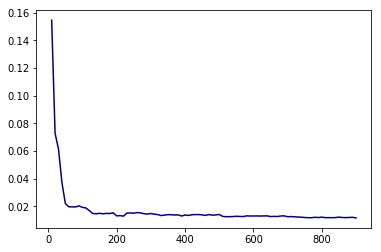

In [8]:
avg_value = pd.DataFrame(acuu_df.mean(axis=1))
avg_value[0] = avg_value[0].apply(lambda x: 1-x)
runs = [i*10 for i in range (1,91)]
runs = pd.DataFrame(runs)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(runs,avg_value,color='navy', linestyle='-')

In [40]:
avg_value

,0
0,0.841314
1,0.924407
2,0.938856
3,0.963008
4,0.979322
5,0.982966
6,0.982246
7,0.981780
8,0.982034
9,0.982542


In [ ]:
## ii. Train a SVM with a pool of 10 randomly selected data points from the training
## set 3 using linear kernel and L 1 penalty. Select the parameters of the SVM
## with 10-fold cross validation. Choose the 10 closest data points in the training
## set to the hyperplane of the SVM 4 and add them to the pool. Do not replace
## the samples back into the training set. Train a new SVM using the pool.
## Repeat this process until all training data is used. You will have 90 SVMs
## that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
## You have implemented active learning.


In [ ]:
## Active

In [2]:
import pandas as pd 
import random as rand
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import auc
import statistics
import warnings
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')


acuu_df1 = pd.DataFrame()
for m in range(0,50):
    accu1=[]
    data= pd.read_csv('data_banknote_authentication.txt',header=None)
    data.columns=[1,2,3,4,'class']

    test_data = data.sample(472,random_state=rand.randint(0,100))
    index_test = test_data.index

    train_data = data.drop(index=index_test)
    test_data = test_data.reset_index(drop=True)
    test_data_x = test_data.drop('class',axis=1)
    test_data_y = test_data['class'] 

    accu_df=pd.DataFrame()
    i = StratifiedKFold(n_splits=90)
    train_data_x= train_data.drop(['class'],axis=1)
    train_data_x = train_data_x.reset_index(drop=True)
    train_data_y = train_data['class']
    train_data_y = train_data_y.reset_index(drop=True)
    cvs=5
    for train_index,test_index in i.split(train_data_x,train_data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        split_10_x,split_10_y=train_data_x.iloc[test_index], train_data_y.iloc[test_index]
        temp_df= pd.concat([split_10_x,split_10_y],axis=1)
        #print(temp_df)
        accu_df = pd.concat([accu_df,temp_df],axis=0)
        accu_df_x = accu_df.drop('class',axis=1)
        accu_df_y = accu_df['class']
        
        #print(accu_df)
        #print(accu_df_y)
        #parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        #clf = GridSearchCV(LinearSVC(multi_class='ovr',penalty='l1',loss='squared_hinge',dual=False), parameters,cv=cvs)
        #cvs=10
        #clf.fit(accu_df_x,accu_df_y)
        #pred_y = clf.predict(test_data_x)
        #accu.append(accuracy_score(test_data_y,pred_y))
        break
    
    for i in range(1,90):
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        clf = GridSearchCV(LinearSVC(penalty='l1',loss='squared_hinge',dual=False), parameters,cv=5)
        
        clf.fit(accu_df_x,accu_df_y)
        train_data_x= train_data_x.reset_index(drop=True)
        l = abs(clf.decision_function(train_data_x))
        dist_df =  pd.DataFrame(l)

        dist_df = dist_df.sort_values(0)
        dist_df = dist_df.iloc[0:10,]
        dist_df_index = dist_df.index
        temp  =  train_data.iloc[dist_df_index,:]
        #temp = pd.DataFrame(temp1)
        train_data_x= train_data_x.drop(index = dist_df_index)

        pred_y = clf.predict(test_data_x)
        accu1.append(accuracy_score(test_data_y,pred_y))
        accu_df = pd.concat([accu_df,temp],axis=0)
        #print(accu_df)
    
        accu_df.reset_index(drop=True,inplace=True)
        accu_df_x = accu_df.drop('class',axis=1)
        accu_df_y = accu_df['class']
        #rint(accu_df)
    column_values = pd.Series(accu1)
    acuu_df1.insert(loc=m, column=m, value=column_values)



In [3]:

acuu_df1.reset_index(drop=True,inplace=True)

Text(0,0.5,'Average Test Error')

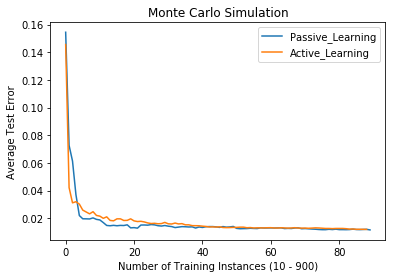

In [9]:
import numpy as np  
avg_value = np.mean(acuu_df,axis=1)


import matplotlib.pyplot as plt
%matplotlib inline



avg_value1 = np.mean(acuu_df1,axis=1)




p = pd.DataFrame({'Passive_Learning': 1-avg_value , 'Active_Learning':1-avg_value1})

ax = p.plot(style='-',title='Monte Carlo Simulation')
ax.set_xlabel("Number of Training Instances (10 - 900)")
ax.set_ylabel("Average Test Error")

In [ ]:
# from the above graph we can see that the active learning model is taking more time reach the low test error. Beacuse we are taking only 10 nearest values in each run. But in case of the passive learning random values are taken which will help in learning large bnad of data(though not very accurate) but the values might cover large span of data.